In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import itertools
from PIL import Image

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Get Paths of Training and testing directories

Training = '/content/drive/MyDrive/Brain_Tumor_Detection_Real/Brain Tumor real/Training'

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

tr_dir = os.listdir(Training)

In [8]:
# Get paths and Labels of classes and images in Training Directory

for i in tr_dir:
    classpath = os.path.join(Training, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

In [9]:
# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Tr_data = pd.concat([Paths, Labels], axis = 1)

In [10]:
# Get Paths of testing directory

Testing = '/content/drive/MyDrive/Brain_Tumor_Detection_Real/Brain Tumor real/Testing'

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

ts_dir = os.listdir(Testing)

In [11]:
# Get paths and Labels of classes and images in Training Directory

for i in ts_dir:
    classpath = os.path.join(Testing, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

In [12]:
# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Ts_data = pd.concat([Paths, Labels], axis = 1)

In [13]:
Tr_data.shape

(5712, 2)

In [14]:
Tr_data.head()

,Paths,Labels
0,/content/drive/MyDrive/Brain_Tumor_Detection_R...,meningioma
1,/content/drive/MyDrive/Brain_Tumor_Detection_R...,meningioma
2,/content/drive/MyDrive/Brain_Tumor_Detection_R...,meningioma
3,/content/drive/MyDrive/Brain_Tumor_Detection_R...,meningioma
4,/content/drive/MyDrive/Brain_Tumor_Detection_R...,meningioma


In [15]:
Ts_data.shape

(1311, 2)

In [16]:
Ts_data.head()

,Paths,Labels
0,/content/drive/MyDrive/Brain_Tumor_Detection_R...,notumor
1,/content/drive/MyDrive/Brain_Tumor_Detection_R...,notumor
2,/content/drive/MyDrive/Brain_Tumor_Detection_R...,notumor
3,/content/drive/MyDrive/Brain_Tumor_Detection_R...,notumor
4,/content/drive/MyDrive/Brain_Tumor_Detection_R...,notumor


In [17]:
valid_df, test_df = train_test_split(Ts_data, train_size = 0.5, shuffle = True, random_state = 123)
print(valid_df.shape)
print(test_df.shape)

(655, 2)
(656, 2)


In [19]:
# Define hyperparameters

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


#Create generators

Tr_G = ImageDataGenerator(fill_mode='nearest')

Val_G = ImageDataGenerator()

Test_G = ImageDataGenerator()

In [20]:
Train = Tr_G.flow_from_dataframe(Tr_data, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)


Found 5712 validated image filenames belonging to 4 classes.


In [21]:
Valid = Val_G.flow_from_dataframe(valid_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 655 validated image filenames belonging to 4 classes.


In [22]:
Test = Test_G.flow_from_dataframe(test_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 656 validated image filenames belonging to 4 classes.


In [23]:
L_index = Train.class_indices
L_index

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [24]:
Keys = list(L_index.keys())
Keys

['glioma', 'meningioma', 'notumor', 'pituitary']

In [25]:
imgs, labels = next(Train)

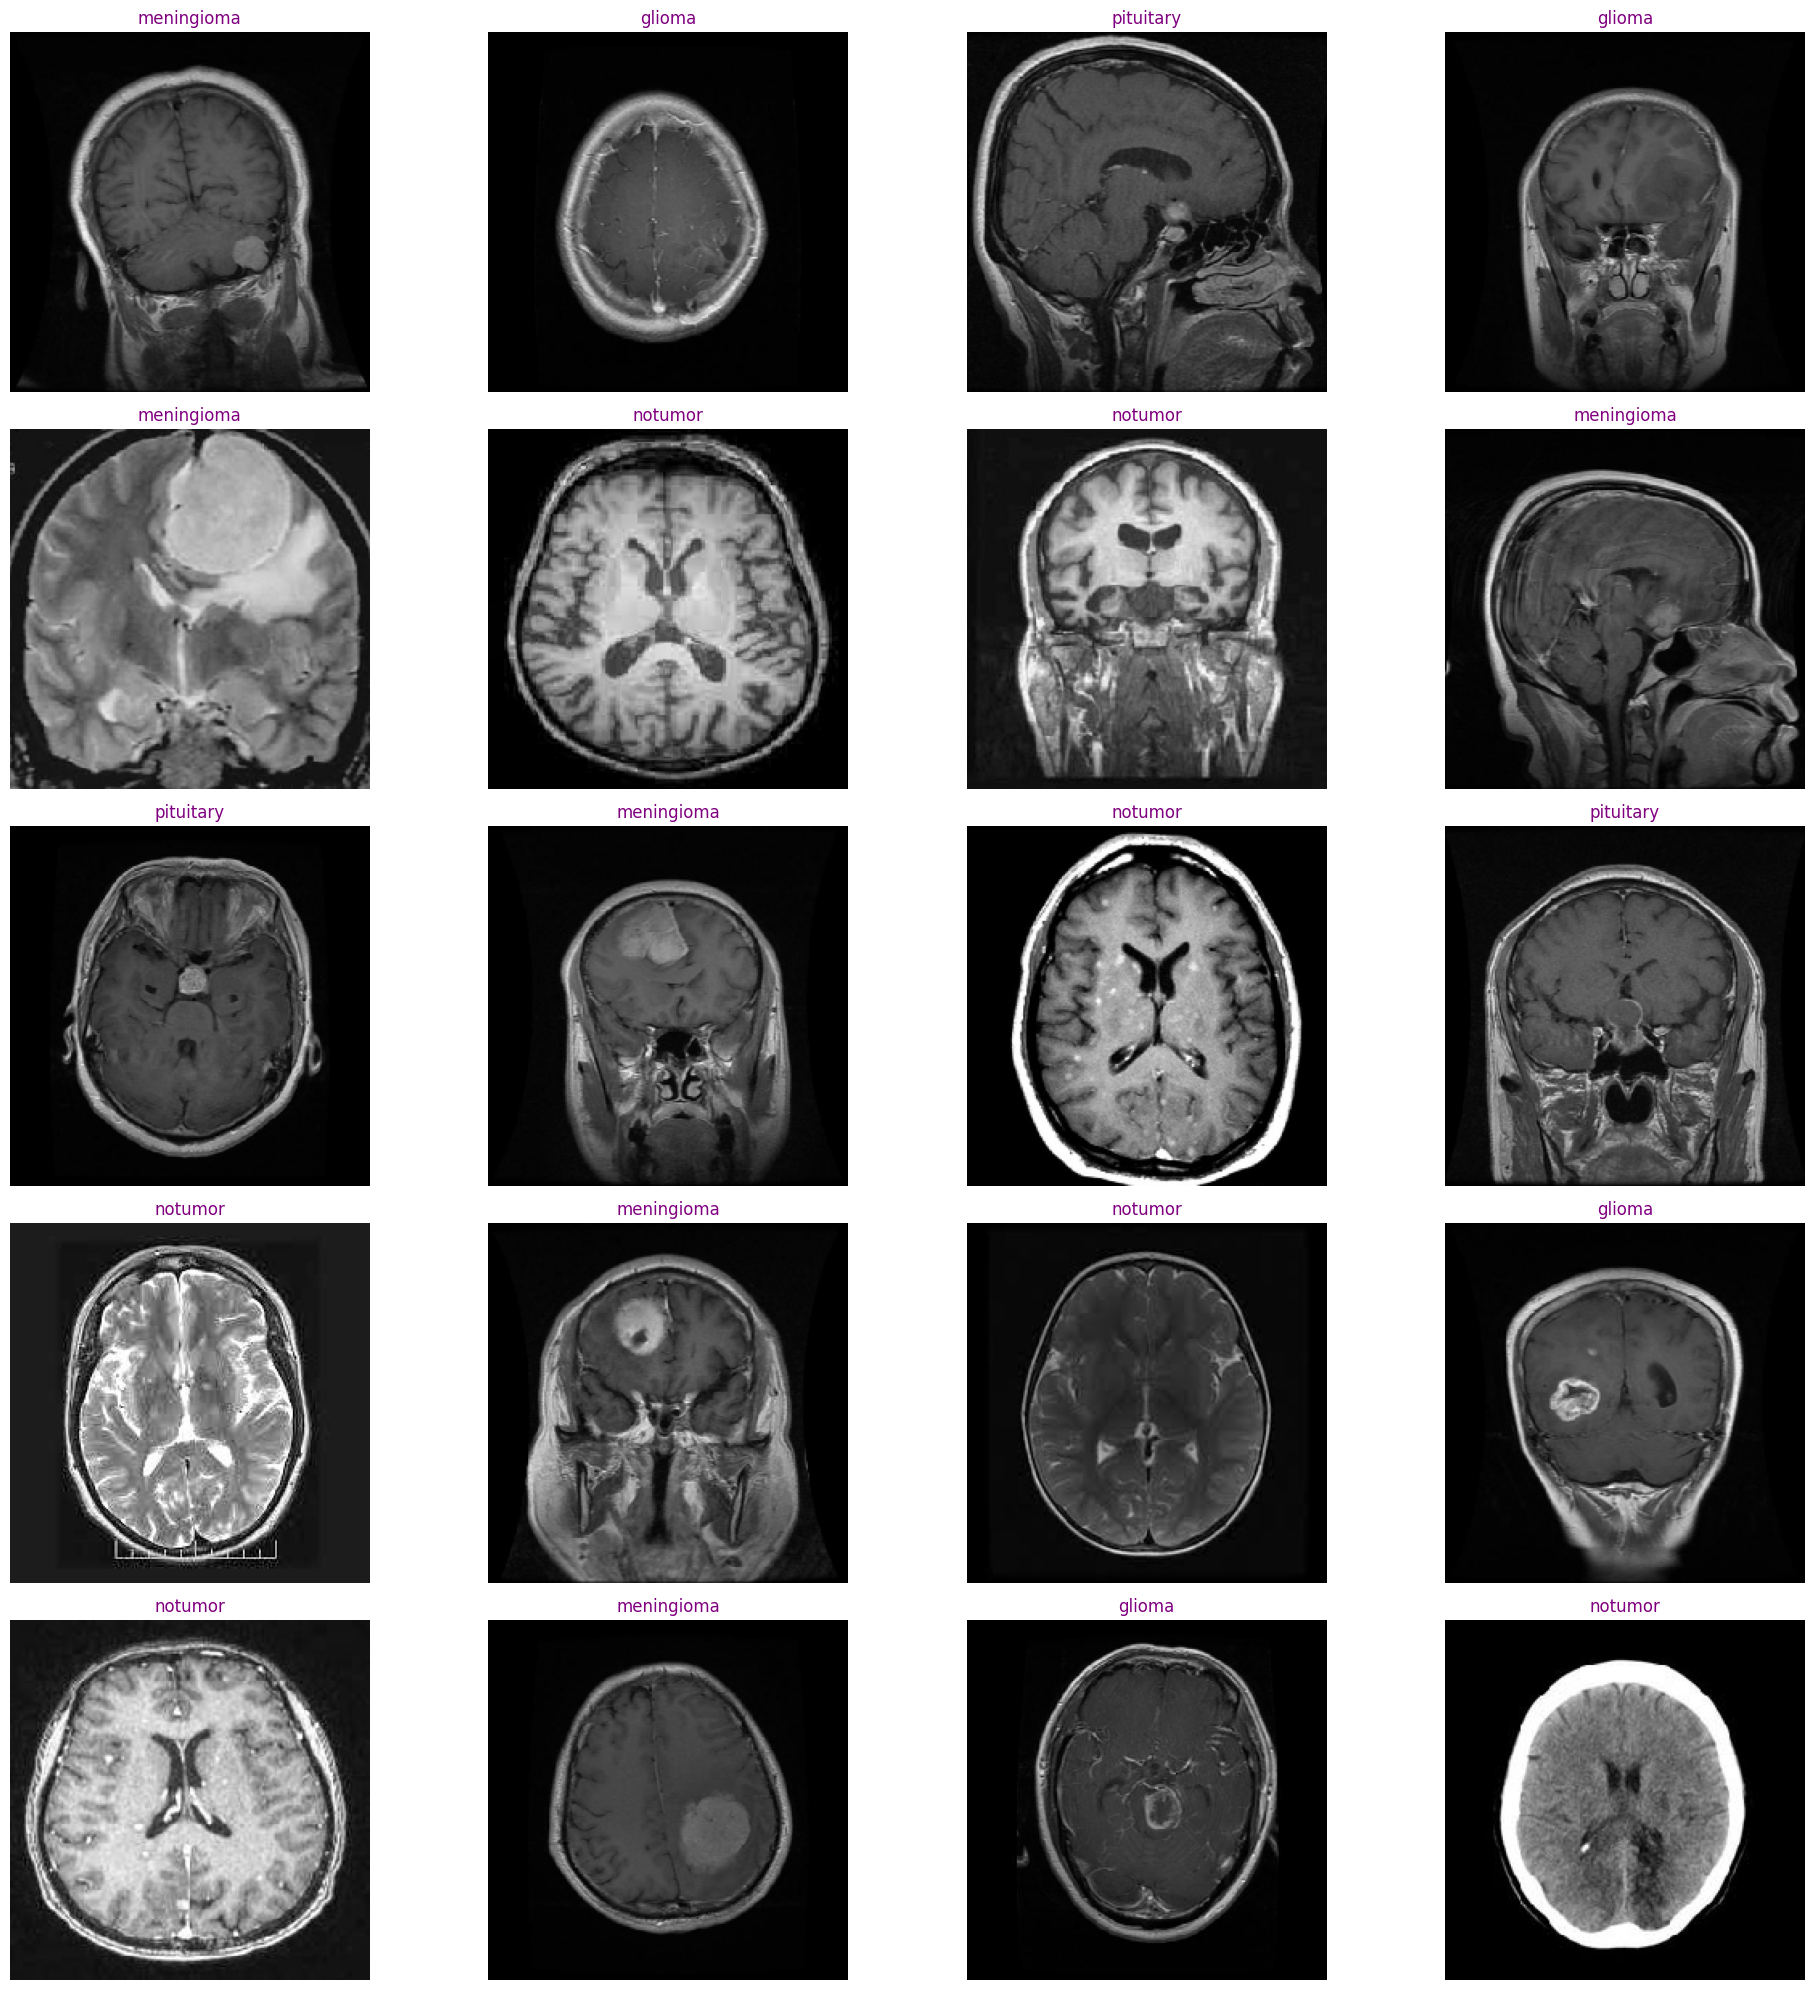

In [26]:
plt.figure(figsize= (20, 20))

for i in range(20):
    plt.subplot(5, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)

    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
# Define hyperparameters

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [28]:
Train

In [29]:
# Define number of classes
counter_classes = len(list(Train.class_indices.keys()))
counter_classes

4

In [30]:
CNN = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation = 'elu'),
    Dense(128, activation = 'elu'),
    Dense(64, activation = 'elu'),
    Dense(32, activation = 'elu'),
    Dense(counter_classes, activation = 'softmax')
])

In [31]:
# Model Compilation
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [32]:
# Get summary
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 256)     590080    
                                                        

In [33]:
Train

In [34]:
epochs = 15

history = CNN.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/15
286/286 [==============================] - 3445s 12s/step - loss: 0.7697 - accuracy: 0.7253 - val_loss: 0.4957 - val_accuracy: 0.7969
Epoch 2/15
286/286 [==============================] - 192s 670ms/step - loss: 0.3644 - accuracy: 0.8687 - val_loss: 0.5755 - val_accuracy: 0.8076
Epoch 3/15
286/286 [==============================] - 192s 671ms/step - loss: 0.2824 - accuracy: 0.8983 - val_loss: 0.3167 - val_accuracy: 0.8718
Epoch 4/15
286/286 [==============================] - 192s 670ms/step - loss: 0.2105 - accuracy: 0.9226 - val_loss: 0.2953 - val_accuracy: 0.8931
Epoch 5/15
286/286 [==============================] - 190s 663ms/step - loss: 0.1846 - accuracy: 0.9336 - val_loss: 0.3092 - val_accuracy: 0.8794
Epoch 6/15
286/286 [==============================] - 189s 661ms/step - loss: 0.1510 - accuracy: 0.9489 - val_loss: 0.1558 - val_accuracy: 0.9313
Epoch 7/15
286/286 [==============================] - 189s 659ms/step - loss: 0.1260 - accuracy: 0.9548 - val_loss: 0.1857 - 

In [35]:
# accuracy and loss of Train

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)


# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

In [36]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.7253151535987854, 0.868697464466095, 0.8982843160629272, 0.9226190447807312, 0.9336484670639038, 0.9488795399665833, 0.9548319578170776, 0.9670868515968323, 0.975665271282196, 0.9777660965919495, 0.9856442809104919, 0.9859943985939026, 0.9891456365585327, 0.9873949289321899, 0.9935224056243896]


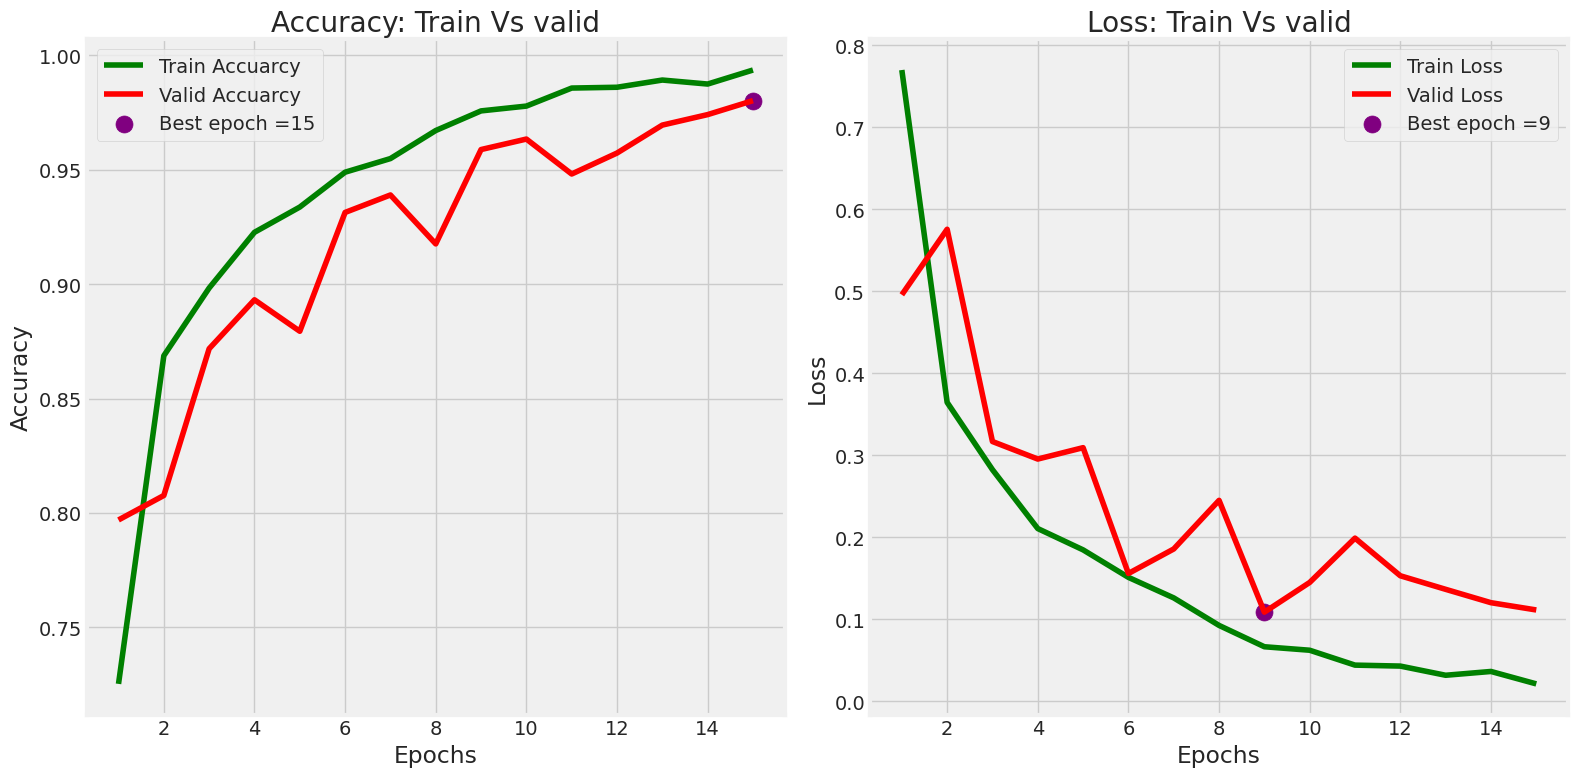

In [37]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
# Define Vars
Train_sc = CNN.evaluate(Train, verbose = 0)
Valid_sc = CNN.evaluate(Valid, verbose = 0)
Test_sc =CNN.evaluate(Test, verbose = 0)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Train Scores : 
    accuracy: 0.9985994100570679 
      Loss:  0.005030296742916107 
________________________
Valid Scores : 
    accuracy: 0.9801526665687561 
      Loss:  0.11128140240907669 
________________________
Test Scores : 
    accuracy: 0.9756097793579102 
      Loss:  0.11397670954465866 
________________________


In [39]:
predictions = CNN.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

[[9.9996233e-01 3.6372370e-05 8.0394892e-07 4.8026459e-07]
 [2.2734406e-07 4.8811279e-07 9.6261728e-11 9.9999928e-01]
 [3.7066176e-05 9.9996173e-01 1.0903565e-06 7.5311824e-08]
 ...
 [3.1415672e-07 9.6614677e-01 3.3852883e-02 5.0493353e-11]
 [3.1051153e-09 1.2372570e-06 9.9999881e-01 1.4255386e-12]
 [1.2194932e-04 1.2306172e-03 1.6239971e-08 9.9864739e-01]]
[0 3 1 2 0 3 3 1 0 1 1 0 3 3 3 3 0 1 1 0 1 1 2 2 1 2 2 3 2 2 2 2 2 0 3 2 3
 3 1 2 2 0 0 1 3 3 3 1 0 1 2 0 0 3 2 3 2 1 2 0 3 1 0 0 0 1 3 0 1 0 2 1 2 1
 1 2 2 0 1 3 3 2 0 0 3 2 3 2 3 2 1 2 3 2 3 3 3 1 0 0 2 0 0 1 3 0 2 3 0 2 2
 3 1 2 2 1 2 3 1 3 1 1 3 0 2 2 1 2 2 0 2 3 2 0 3 2 1 3 3 1 1 2 2 3 2 1 3 1
 3 3 2 2 3 2 2 2 0 0 2 2 1 2 0 2 3 3 1 1 2 2 2 2 1 2 2 2 2 3 1 1 1 2 2 2 3
 1 2 2 0 2 1 2 3 1 0 0 2 2 2 3 2 0 1 2 1 2 2 2 2 2 1 3 2 0 0 2 0 2 2 3 2 3
 0 2 1 0 2 1 2 1 0 3 1 0 1 0 3 2 0 0 3 0 0 2 2 3 0 3 0 1 1 2 3 3 3 3 1 2 0
 2 0 2 3 3 3 1 3 0 1 0 2 2 0 2 1 2 0 0 1 1 3 3 3 1 3 1 1 2 1 1 2 2 3 3 2 2
 1 0 3 1 1 2 3 2 1 2 2 1 0 1 1 0 3 1 0 0

In [41]:
# Use n. of keys of  Class indices to greate confusion matrix
Test_cl_ind = Test.class_indices

# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[135,   7,   0,   0],
       [  5, 145,   0,   3],
       [  0,   0, 222,   0],
       [  1,   0,   0, 138]])

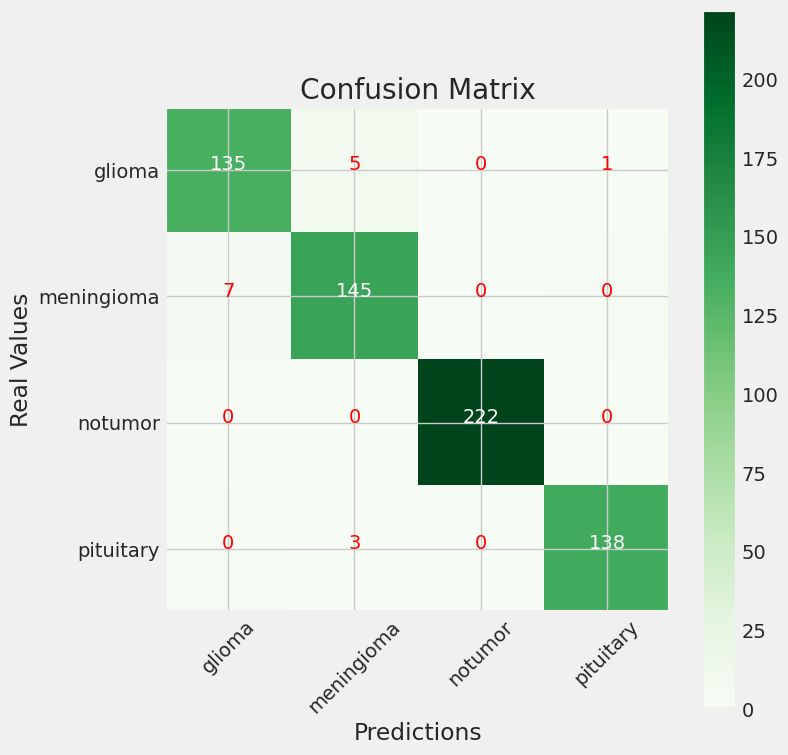

In [43]:
#visualise it
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')

plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [44]:
# Calssification Report
print(classification_report(Test.classes, y_pred, target_names = classes))

              precision    recall  f1-score   support

      glioma       0.96      0.95      0.95       142
  meningioma       0.95      0.95      0.95       153
     notumor       1.00      1.00      1.00       222
   pituitary       0.98      0.99      0.99       139

    accuracy                           0.98       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.98      0.98      0.98       656



In [45]:
CNN.save('RealCNN.h5')

In [48]:
CNN = tf.keras.models.load_model("/content/drive/MyDrive/Brain_Tumor_Detection_Real/Brain Tumor real/RealCNN.h5", compile = False)
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [1]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# image path
path = '/content/drive/MyDrive/Brain_Tumor_Detection_Real/Brain Tumor real/Training/pituitary/Tr-piTr_0009.jpg'

# open image
img = Image.open(path)

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Predictions ratio for each class
p = CNN.predict(iArray)

# Get score:
score = tf.nn.softmax(p[0])
print('\nPredictions of given image:  \n\n', score)

# Get class whose max ratio
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
predicted_class = cl_labels[np.argmax(p)]

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Display the predicted image with class label
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')

plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Brain_Tumor_Detection_Real/Brain Tumor real/Training/pituitary/Tr-piTr_0009.jpg'

1/1 [==============================] - 2s 2s/step

Predictions of given image:  

 tf.Tensor([0.17507088 0.4750202  0.17493594 0.1749729 ], shape=(4,), dtype=float32)


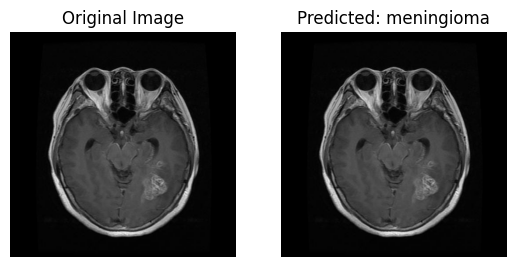

In [9]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model_path = 'D:/FYP/Brain Tumor Detection/RealCNN.h5'
CNN = tf.keras.models.load_model(model_path)

# Image path
path = 'D:/FYP/Brain Tumor Detection/haha.jpg'

# Open image
img = Image.open(path)

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Predictions ratio for each class
p = CNN.predict(iArray)

# Get score:
score = tf.nn.softmax(p[0])
print('\nPredictions of given image:  \n\n', score)

# Get class whose max ratio
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
predicted_class = cl_labels[np.argmax(p)]

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Display the predicted image with class label
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')

plt.show()
